# SmartRetail’s Growing Challenges in Customer Engagement

### Juliana Afini - 67627 TXC

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Dataset, Reader, SVD
from surprise import accuracy
import random
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import pickle
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("SmartRetail_dataset.csv")

## Question 1 (Code Section 2)

### Q1.1 

#### i. Subscription and discount trends are gender-driven and do not drive retention
- Males are the primary subscribers (39.7% subscribe) and the dominant users of discounts (63.2% use discounts) while females, who represent a significant portion of the customer base, show no engagement with these offers. However, neither discounts nor subscriptions lead to increased spending, repeat purchases, or improved satisfaction. This suggests that these marketing strategies are failing to engage the broader customer base and do not foster long-term loyalty.

#### ii. Frequent shoppers buy low-cost, high-rotation items, but engagement remains weak
- Weekly shoppers primarily purchase lower-cost, frequently used items like Sweaters, Skirts, Shirts and Pants. However, some of these items also tend to have slightly lower review ratings, especially Shirts and Pants, indicating potential quality or expectation issues. This mismatch between high sales and lower satisfaction suggests that frequently bought items may require product improvements or better expectation management.

#### iii. Payment methods reflect convenience over loyalty
- Credit Card, PayPal, and Cash are the dominant payment methods, with Bank Transfer and Venmo being the least used. However, there is no clear impact of payment methods on review ratings or customer engagement. This suggests that convenience drives payment choices rather than loyalty programs or incentives. Exploring exclusive perks for specific payment methods (e.g., cashback for subscriptions) could be an opportunity to increase retention.


## Question 2 (Code Section 3)

### Q2.1

The Elbow Method and hierarchical clustering dendrogram both suggest that the optimal number of customer segments is 3. The Elbow Method shows that the WCSS curve starts to flatten after this point. Choosing more clusters beyond this does not significantly reduce within-cluster variance, indicating diminishing returns. The dendrogram for hierarchical clustering suggests that the optimal number of clusters is also 3, as indicated by the largest vertical distances between merged clusters before a significant jump in linkage distance. Cutting the dendrogram at this level ensures well-separated clusters while maintaining a reasonable number of groups for meaningful segmentation.

### Q2.2

The customer segments are reasonably well-defined, as indicated by the Silhouette Scores. K-Means achieved a score of 0.478, while Hierarchical Clustering scored 0.440, suggesting moderate cluster separation. The evaluation was done using the Silhouette Score, which measures how similar each point is to its own cluster versus other clusters. While the scores indicate some overlap between clusters, they still provide meaningful segmentation.

### Q2.3

#### i) Cluster 0 - Occasional Buyers
- Moderate spending and purchase frequency
- Prefers Accessories and Outerwear
- Uses discounts and subscriptions at a moderate rate
- Represents casual shoppers who purchase when needed but are not highly engaged

#### ii. Cluster 1 - Deal-Driven Frequent Shoppers
- Highest purchase frequency
- Strong reliance on discounts and subscriptions
- Mostly buys Clothing and Footwear
- Price-sensitive customers who respond well to promotions but may not be naturally loyal

#### iii. Cluster 2 - High-Spending Consistent Shoppers
- Spends the most per transaction (61.09)
- Shops less frequently but makes bigger purchases
- Less dependent on discounts and subscriptions
- Represents consistent, high-value customers who buy regardless of promotions

## Question 3 (Code Section 4)

### Q3.1

To address the company’s need, I developed and evauated three classification models: XGBoost, Random Forest and Logistic Regression to predict the subscription probability of a customer based on the relevant features presented in the dataset. These models were chosen because capture complex relationships within the data, and provide interpretability through feature importance analysis. Given that our goal is to optimize a marketing campaign, I prioritized models that can differentiate potential subscribers accurately. XGBoost was selected due to its strong performance in structured data tasks, while Random Forest was included as a robust baseline that is less sensitive to hyperparameter tuning. Both models underwent hyperparameter optimization and were evaluated using precision, as the company aims to minimize false positives in its outreach efforts.

### Q3.2

For deployment, XGBoost is the preferred choice as it achieved the highest precision (0.414) among all trained models. Since the primary goal is to maximize marketing efficiency, precision is the most crucial metric to ensure outreach efforts are focused on users who are truly likely to subscribe. However, Random Forest also performed well, with a competitive precision (0.398), a significantly higher recall (0.71), and a better F1-score (0.52). This suggests that Random Forest balances capturing more potential subscribers while maintaining reasonable accuracy. While Logistic Regression achieved the highest recall (0.975), it had the lowest precision (0.395). This makes it less suitable for this campaign, as misclassifying too many non-subscribers would result in wasted marketing resources.

One major limitation is the model’s reliance on Gender as the most important feature, despite having no actual female subscribers in the dataset. This suggests a feature bias issue that could mislead marketing strategies. Additionally, the lift curves for all models are very close together, indicating that no model provides a significantly stronger lift effect, suggesting that the dataset features may not be highly predictive of subscription behavior. The lift curve also flattens around 60% of the population, meaning the models struggle to rank subscribers beyond a certain threshold​.

## Question 4 (Code Section 5)

### Q4.1
To develop a recommendation system that better aligns with customer purchasing behavior and preferences, SmartRetail should implement a content-based recommendation system enhanced with demographic filtering. Since the dataset contains only one purchase per customer, collaborative filtering is not a viable approach due to the lack of historical user-item interaction data. Instead, a content-based filtering method leverages product attributes (e.g., category, color) along with customer demographics such as age, gender, location, and season to generate more personalized recommendations.

For implementation, TF-IDF (Term Frequency-Inverse Document Frequency) embeddings are used to represent product descriptions or categories numerically. A cosine similarity model is then applied to compare purchased items with other available products to generate the most relevant suggestions. Additionally, I also made an alternative system with demographic-based recommendations to ensure that users receive recommendations based on what similar customers (same age group, gender, location, and season of purchase) have bought. Numerical factors like purchase amount and review rating are also incorporated to fine-tune recommendations. This approach enhances the personalization of recommendations, increasing user engagement and sales potential.

### Q4.2

Traditional evaluation metrics like Precision, Recall, Mean Average Precision (MAP), and Normalized Discounted Cumulative Gain (NDCG) are commonly used to measure the relevance of top recommendations. However, these metrics are not well-suited for our dataset because we only have one purchase per customer, meaning there is no set of "relevant" items to compare against for recall-based metrics. Additionally, offline A/B testing would require simulating missing purchases, which is impractical given the dataset's structure.

Instead, I made an analysis of the aggregate similarity score from the content-only system, which evaluates how similar the recommended items are to the actual purchased item. The resulting average similarity score was 0.58, meaning that on average, recommended products have a moderate level of similarity to the originally purchased item. One of the main reasons for this relatively low score is that our content-based approach relies heavily on broad product features such as category and color, rather than more descriptive attributes like the item’s style or specific design details, which are unavailable in the dataset. This makes it harder to differentiate between truly relevant and loosely related recommendations.

### Q4.3

- Collecting more customer purchase history – Currently, the dataset contains only a single purchase per customer, limiting the effectiveness of recommendations. Expanding the dataset to include multiple purchases per customer would allow the system to identify stronger patterns in customer behavior, improving the accuracy of recommendations. This would also enable the implementation of a hybrid recommendation approach, where collaborative filtering can be combined with content-based filtering to provide more personalized suggestions based on both individual preferences and broader customer trends.

- Enhancing product descriptions with detailed attributes – The existing content-based filtering approach relies on general product features such as category and color, which may not be sufficiently distinctive for high-quality recommendations. Adding more descriptive attributes—such as product style, brand, material, or intended use case—would allow for a more nuanced similarity comparison. This would help in refining the content-based filtering component and making recommendations more relevant.

-----------------------------------------------------------------------------------------------------------------------------

# Full code

## Section 1: Prepare data for analysis

### Data description

In [3]:
# Removing any leading or trailing spaces from column names of the dataframe.

df.rename(columns=lambda x: x.strip(), inplace=True)

df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [4]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [5]:
df.shape

(3900, 18)

The dataframe has 3900 rows and 18 columns.

### Feature description

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [7]:
df["Customer ID"] = df["Customer ID"].astype('object')

In [8]:
df[df.select_dtypes(include=['object']).columns] = df.select_dtypes(include=['object']).astype('category')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   category
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   category
 3   Item Purchased          3900 non-null   category
 4   Category                3900 non-null   category
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   category
 7   Size                    3900 non-null   category
 8   Color                   3900 non-null   category
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   category
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   category
 14  Promo Code Used         

### Missing Values and Duplicates

In [11]:
df.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df['Customer ID'].duplicated().sum()

0

In [14]:
customer_id_counts = df["Customer ID"].value_counts().reset_index()
customer_id_counts.columns = ["Customer ID", "Row Count"]
customer_id_counts = customer_id_counts.sort_values(by="Row Count", ascending=False)

# Display the table
print(customer_id_counts)


     Customer ID  Row Count
0              1          1
2620          60          1
2592          30          1
2593          15          1
2594           3          1
...          ...        ...
1304        3894          1
1305        3895          1
1306        3896          1
1307        3897          1
3899        3900          1

[3900 rows x 2 columns]


## Section 2: Exploratory Data Analysis

### i. Overall customer description

#### Age distribution

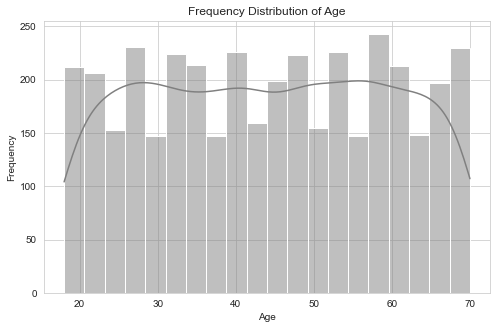

In [15]:
sns.set_style("whitegrid")

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="grey")

# Labels and title
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Age")

# Show plot
plt.show()

In [16]:
average_age = df["Age"].mean()
print(f"Average Age: {average_age:.2f}")

Average Age: 44.07


#### Gender distribution

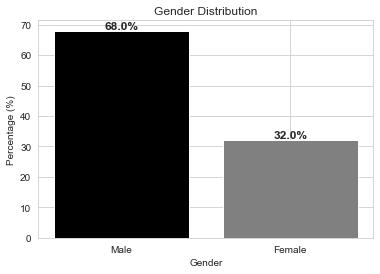

In [17]:
gender_counts = df["Gender"].value_counts(normalize=True) * 100

# Plot bar chart
plt.figure(figsize=(6, 4))
bars = plt.bar(gender_counts.index, gender_counts.values, color=["black", "grey"])

# Add labels on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%", 
             ha="center", va="bottom", fontsize=12, fontweight="bold")

# Labels and title
plt.xlabel("Gender")
plt.ylabel("Percentage (%)")
plt.title("Gender Distribution")

# Show plot
plt.show()

Observations:
- Gender Distribution: The dataset shows a significant gender imbalance, with 68% of individuals identifying as male and only 32% as female. This indicates that males are more than twice as represented as females.
- Age Distribution: The age distribution appears relatively uniform, with frequencies remaining fairly stable across different age groups. However, there is a slight decline in representation at the youngest (below 20) and oldest (above 70) age brackets.

### ii. Purchase description

#### Category evaluation

In [18]:
def plot_categorical_analysis(df, x, x_order):
    x_counts = df[x].value_counts().reset_index()
    x_counts.columns = [x, "Count"]
    
    x_sum = df.groupby(x)["Purchase Amount (USD)"].sum().reset_index()
    
    x_counts[x] = pd.Categorical(x_counts[x], categories=x_order, ordered=True)
    x_counts = x_counts.sort_values(x)

    x_sum[x] = pd.Categorical(x_sum[x], categories=x_order, ordered=True)
    x_sum = x_sum.sort_values(x)

    df[x] = pd.Categorical(df[x], categories=x_order, ordered=True)

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    sns.barplot(data=x_counts, x=x, y="Count", ax=axes[0], palette="Blues", order=x_order)
    axes[0].set_title(f"Value Counts for {x}")
    axes[0].set_xlabel(x)
    axes[0].set_ylabel("Count")
    axes[0].set_ylim(x_counts["Count"].min() * 0.9, x_counts["Count"].max() * 1.1)

    for p in axes[0].patches:
        axes[0].annotate(f"{p.get_height():,.0f}", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

    sns.barplot(data=x_sum, x=x, y="Purchase Amount (USD)", ax=axes[1], palette="Blues", order=x_order)
    axes[1].set_title(f"Total Purchase Amount for Each {x}")
    axes[1].set_xlabel(x)
    axes[1].set_ylabel("Total Purchase Amount (USD)")
    axes[1].set_ylim(x_sum["Purchase Amount (USD)"].min() * 0.9, x_sum["Purchase Amount (USD)"].max() * 1.1)

    for p in axes[1].patches:
        axes[1].annotate(f"${p.get_height():,.0f}", 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10, fontweight='bold')

    sns.boxplot(data=df, x=x, y="Purchase Amount (USD)", ax=axes[2], palette="Blues", order=x_order)
    axes[2].set_title(f"Purchase Amount Dispersion by {x}")
    axes[2].set_xlabel(x)
    axes[2].set_ylabel("Purchase Amount (USD)")

    plt.tight_layout()
    plt.show()



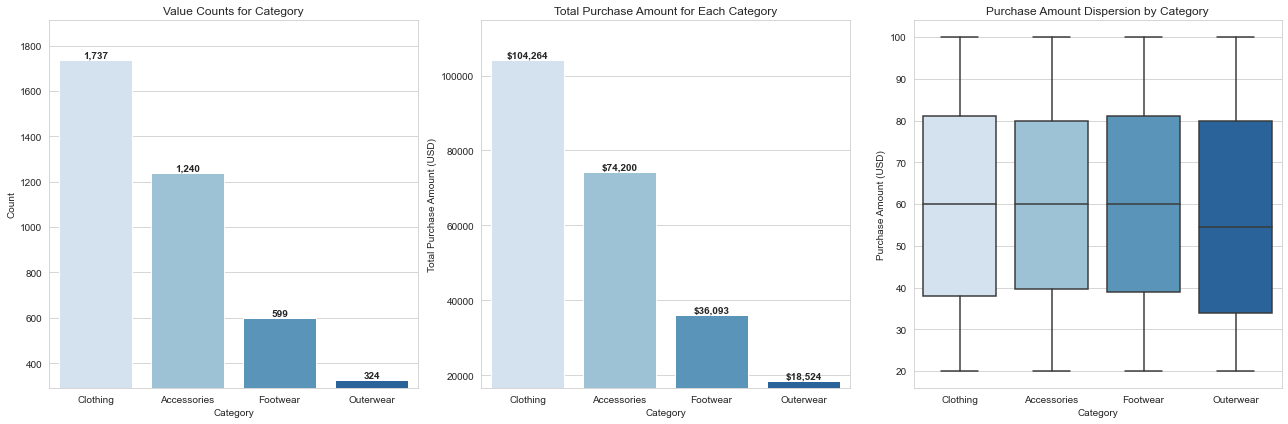

In [19]:
category_order = ["Clothing", "Accessories", "Footwear", "Outerwear"]

plot_categorical_analysis(df, "Category", category_order)

#### Top items evaluation, with cut on most frequent purchases

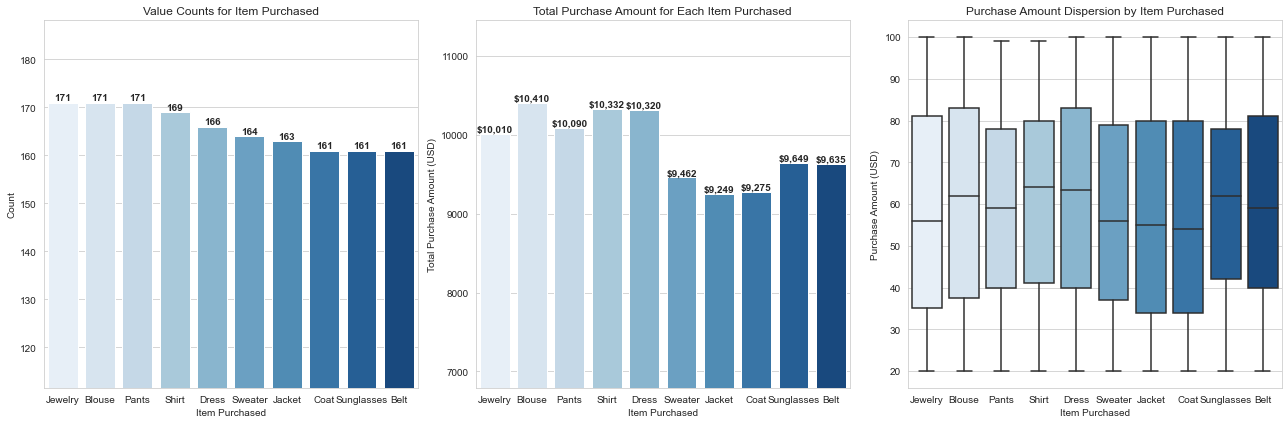

In [20]:
top_10_items = df["Item Purchased"].value_counts().head(10).index.tolist()

plot_categorical_analysis(df, "Item Purchased", top_10_items)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


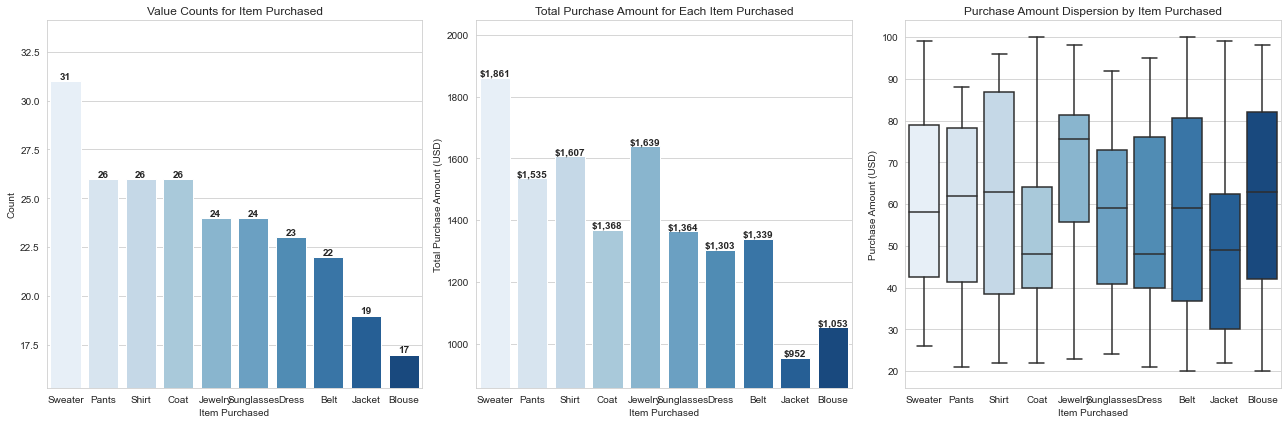

In [21]:
weekly_clients = df[df["Frequency of Purchases"] == "Weekly"]
top_10_items = weekly_clients["Item Purchased"].value_counts().head(10).index.tolist()
weekly_top_10 = weekly_clients[weekly_clients["Item Purchased"].isin(top_10_items)]

plot_categorical_analysis(weekly_top_10, "Item Purchased", top_10_items)

Observations:
- Category Distribution: Clothing is the most frequently purchased category, followed by Accessories. Footwear and Outerwear have significantly lower transaction volumes and total purchase amounts.
- Top Items Purchased: Pants, Jewelry, and Blouses are the most purchased items, with a relatively even distribution among the top 10. The total revenue for these items is similar, suggesting consistent demand.
- Weekly Purchasers (most frequent shoppers): Weekly shoppers prefer lower-cost, frequently purchased items like Sweaters, Skirts, and Shirts. These certain items may have a higher repurchase rate, which could be leveraged for targeted marketing campaigns and customer retention strategies.

#### Seasonality evaluation

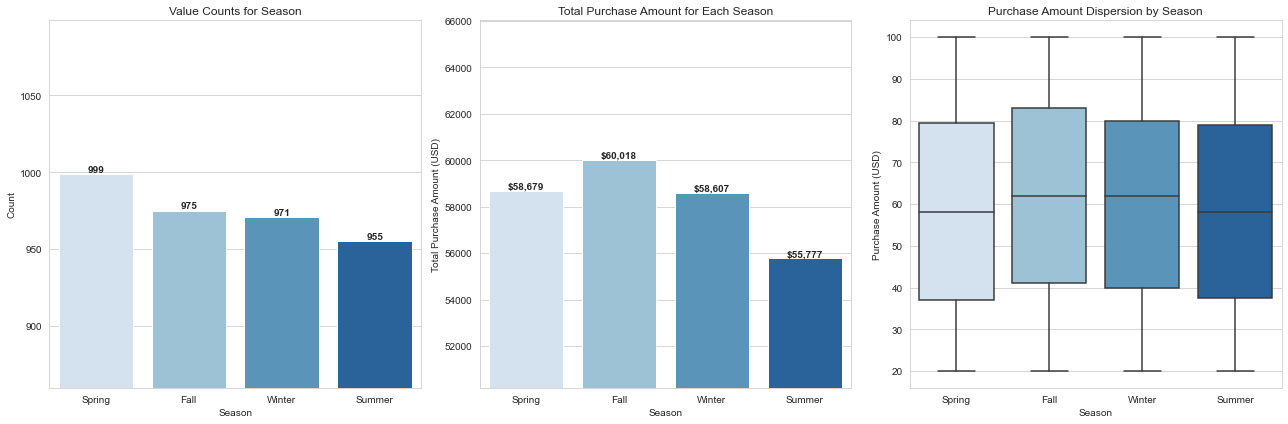

In [22]:
season_order = ["Spring", "Fall", "Winter", "Summer"]

plot_categorical_analysis(df, "Season", season_order)

Observations:
- Seasonal Spending Patterns: The number of purchases remains consistent across all seasons, but Fall records the highest total purchase amount, suggesting larger or higher-value transactions during this period.

### iii. Review ratings

#### Reviews distributions

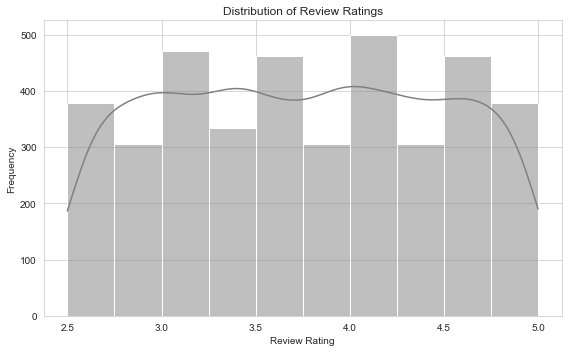

In [23]:
# Create the histogram for review ratings
plt.figure(figsize=(8, 5))
sns.histplot(df["Review Rating"], bins=10, kde=True, color="grey")

# Formatting the plot
plt.title("Distribution of Review Ratings", fontsize=12)
plt.xlabel("Review Rating", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

#### Reviews distribution by item category

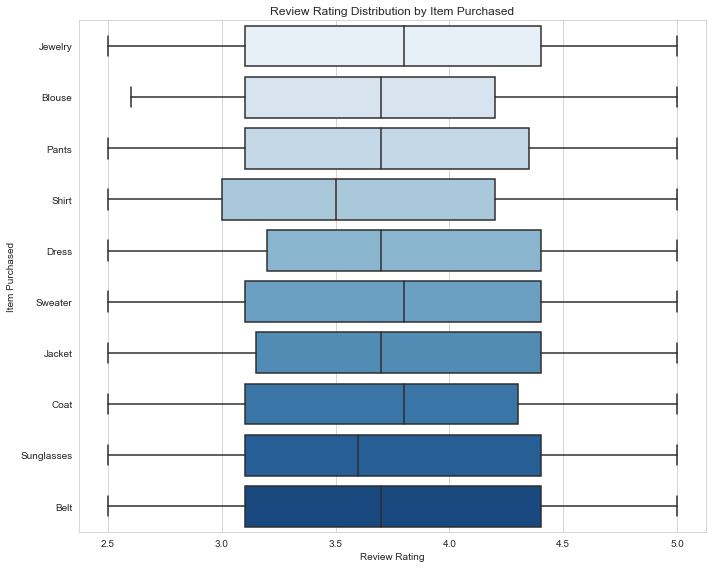

In [24]:
# Calculate average review rating for each item
item_avg_rating = df.groupby("Item Purchased")["Review Rating"].mean().sort_values(ascending=False)

# Create a categorical column to order the boxplot
df["Item Purchased"] = pd.Categorical(df["Item Purchased"], categories=item_avg_rating.index, ordered=True)

# Create the horizontal boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x="Review Rating", y="Item Purchased", palette="Blues")

# Formatting the plot
plt.title("Review Rating Distribution by Item Purchased", fontsize=12)
plt.xlabel("Review Rating", fontsize=10)
plt.ylabel("Item Purchased", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


Observations:
- Review Rating Distribution: The histogram shows a wide spread of ratings, with peaks around 3.0 and 4.5, indicating a mix of satisfied and dissatisfied customers across different products.
- Item-Specific Ratings: Shirts, Jeans, and Blouses have the lowest ratings, suggesting quality or expectation issues despite being commonly purchased. Among them, only Shirts were in the top-selling items list, meaning sales volume does not always correlate with customer satisfaction.
- High Rating Caveat: While Gloves, Sandals and Boots have the highest rating, they have fewer data points, making this less statistically significant compared to more frequently reviewed items.
- Marketing & Product Strategy: Popular but low-rated items (e.g., Shirts) need quality improvements or better expectation management. Meanwhile, well-rated items with lower sales should be promoted more aggressively to improve overall customer satisfaction and retention.

### iv. Subscription and promotions

#### Subscription distribution

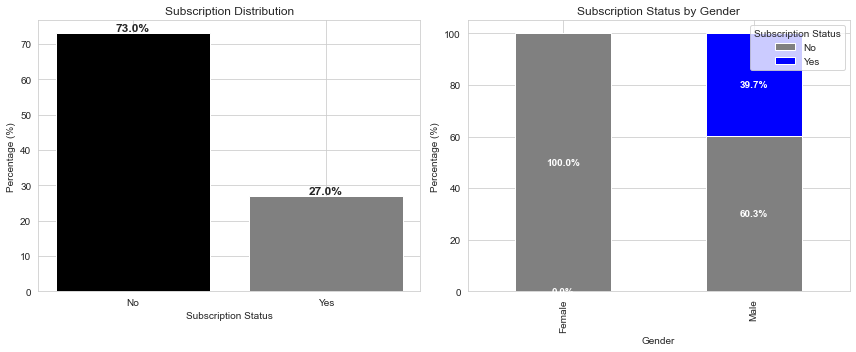

In [25]:
subscription_counts = df["Subscription Status"].value_counts(normalize=True) * 100

subscription_by_gender = df.groupby(["Gender", "Subscription Status"]).size().unstack()
subscription_by_gender = subscription_by_gender.div(subscription_by_gender.sum(axis=1), axis=0) * 100  # Normalize to 100%

colors = {"No": "grey", "Yes": "blue"}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bars = axes[0].bar(subscription_counts.index, subscription_counts.values, color=["black", "grey"])
axes[0].set_xlabel("Subscription Status")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Subscription Distribution")

for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%", 
                 ha="center", va="bottom", fontsize=12, fontweight="bold")

subscription_by_gender.plot(kind="bar", stacked=True, color=[colors["No"], colors["Yes"]], ax=axes[1])

axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_title("Subscription Status by Gender")
axes[1].legend(title="Subscription Status", loc="upper right")

for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

plt.tight_layout()
plt.show()

#### Discount distribution

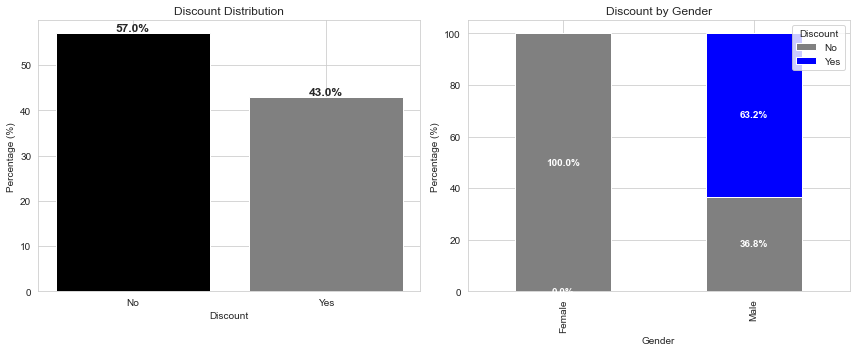

In [26]:
disc_counts = df["Discount Applied"].value_counts(normalize=True) * 100

disc_by_gender = df.groupby(["Gender", "Discount Applied"]).size().unstack()
disc_by_gender = disc_by_gender.div(disc_by_gender.sum(axis=1), axis=0) * 100  # Normalize to 100%

colors = {"No": "grey", "Yes": "blue"}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

bars = axes[0].bar(disc_counts.index, disc_counts.values, color=["black", "grey"])
axes[0].set_xlabel("Discount")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Discount Distribution")

for bar in bars:
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.1f}%", 
                 ha="center", va="bottom", fontsize=12, fontweight="bold")

disc_by_gender.plot(kind="bar", stacked=True, color=[colors["No"], colors["Yes"]], ax=axes[1])

axes[1].set_xlabel("Gender")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_title("Discount by Gender")
axes[1].legend(title="Discount", loc="upper right")

for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

plt.tight_layout()
plt.show()

#### Relation between subscription/discounts and purchase amount

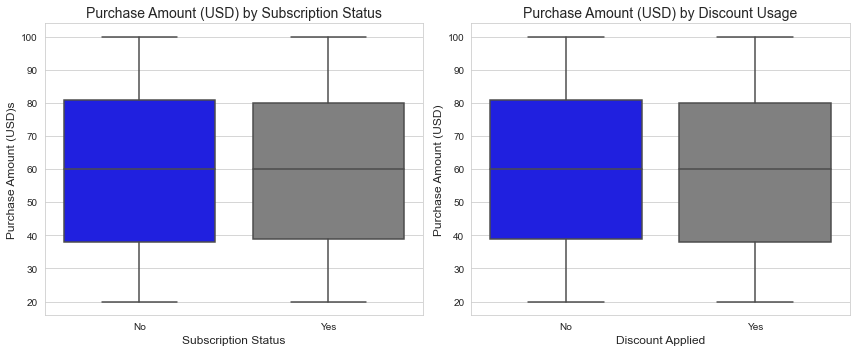

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x="Subscription Status", y="Purchase Amount (USD)", palette=["blue", "grey"], ax=axes[0])
axes[0].set_xlabel("Subscription Status", fontsize=12)
axes[0].set_ylabel("Purchase Amount (USD)s", fontsize=12)
axes[0].set_title("Purchase Amount (USD) by Subscription Status", fontsize=14)

sns.boxplot(data=df, x="Discount Applied", y="Purchase Amount (USD)", palette=["blue", "grey"], ax=axes[1])
axes[1].set_xlabel("Discount Applied", fontsize=12)
axes[1].set_ylabel("Purchase Amount (USD)", fontsize=12)
axes[1].set_title("Purchase Amount (USD) by Discount Usage", fontsize=14)

plt.tight_layout()
plt.show()


#### Relation between subscription/discounts and loyalty/frequency of purchase 

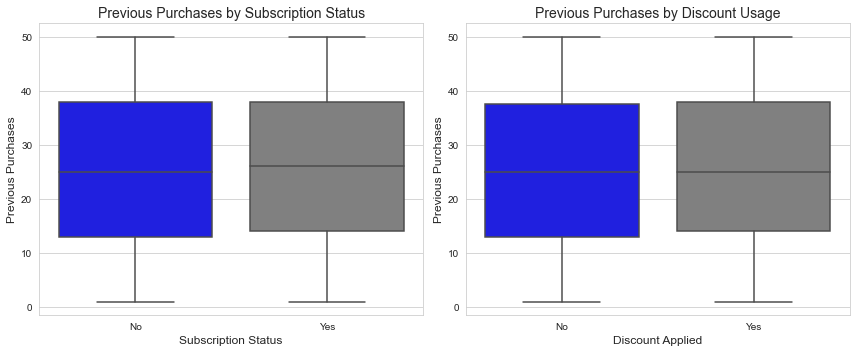

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x="Subscription Status", y="Previous Purchases", palette=["blue", "grey"], ax=axes[0])
axes[0].set_xlabel("Subscription Status", fontsize=12)
axes[0].set_ylabel("Previous Purchases", fontsize=12)
axes[0].set_title("Previous Purchases by Subscription Status", fontsize=14)

sns.boxplot(data=df, x="Discount Applied", y="Previous Purchases", palette=["blue", "grey"], ax=axes[1])
axes[1].set_xlabel("Discount Applied", fontsize=12)
axes[1].set_ylabel("Previous Purchases", fontsize=12)
axes[1].set_title("Previous Purchases by Discount Usage", fontsize=14)

plt.tight_layout()
plt.show()


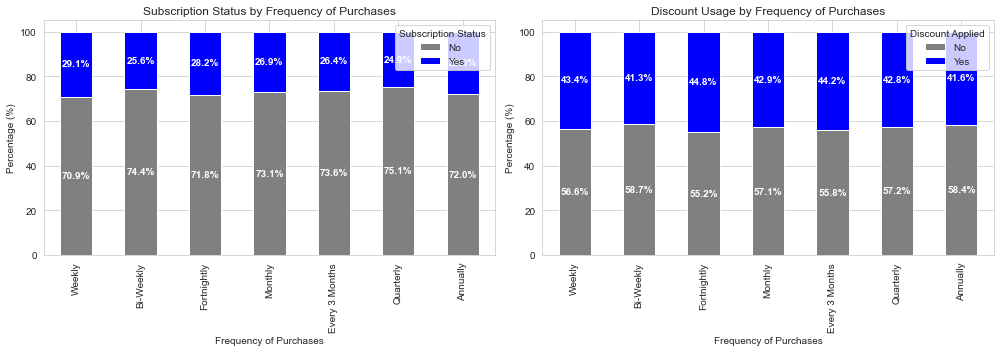

In [29]:
subscription_by_frequency = df.groupby(["Frequency of Purchases", "Subscription Status"]).size().unstack()
subscription_by_frequency = subscription_by_frequency.div(subscription_by_frequency.sum(axis=1), axis=0) * 100  

discount_by_frequency = df.groupby(["Frequency of Purchases", "Discount Applied"]).size().unstack()
discount_by_frequency = discount_by_frequency.div(discount_by_frequency.sum(axis=1), axis=0) * 100  

frequency_order = ["Weekly", "Bi-Weekly", "Fortnightly", "Monthly", "Every 3 Months", "Quarterly", "Annually"]
subscription_by_frequency = subscription_by_frequency.reindex(frequency_order)
discount_by_frequency = discount_by_frequency.reindex(frequency_order)

colors = {"No": "grey", "Yes": "blue"}

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

subscription_by_frequency.plot(kind="bar", stacked=True, color=[colors["No"], colors["Yes"]], ax=axes[0])
axes[0].set_xlabel("Frequency of Purchases")
axes[0].set_ylabel("Percentage (%)")
axes[0].set_title("Subscription Status by Frequency of Purchases")
axes[0].legend(title="Subscription Status", loc="upper right")

for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

discount_by_frequency.plot(kind="bar", stacked=True, color=[colors["No"], colors["Yes"]], ax=axes[1])
axes[1].set_xlabel("Frequency of Purchases")
axes[1].set_ylabel("Percentage (%)")
axes[1].set_title("Discount Usage by Frequency of Purchases")
axes[1].legend(title="Discount Applied", loc="upper right")

for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.1f%%", label_type="center", fontsize=10, color="white", fontweight="bold")

plt.tight_layout()
plt.show()


#### Relation between subscription/discounts and ratings

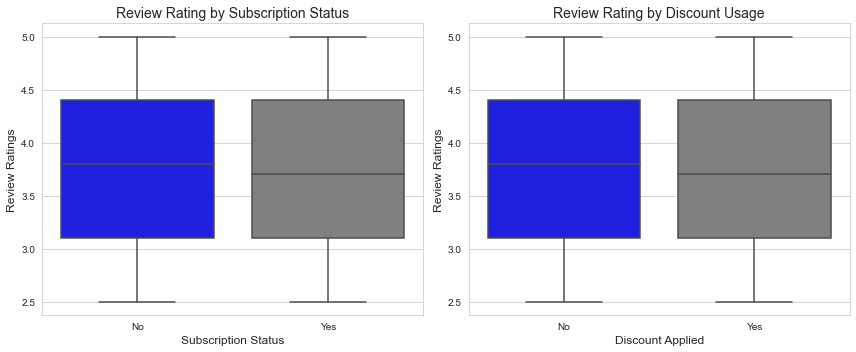

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(data=df, x="Subscription Status", y="Review Rating", palette=["blue", "grey"], ax=axes[0])
axes[0].set_xlabel("Subscription Status", fontsize=12)
axes[0].set_ylabel("Review Ratings", fontsize=12)
axes[0].set_title("Review Rating by Subscription Status", fontsize=14)

sns.boxplot(data=df, x="Discount Applied", y="Review Rating", palette=["blue", "grey"], ax=axes[1])
axes[1].set_xlabel("Discount Applied", fontsize=12)
axes[1].set_ylabel("Review Ratings", fontsize=12)
axes[1].set_title("Review Rating by Discount Usage", fontsize=14)

plt.tight_layout()
plt.show()


Observations:
- Subscription & Discounts: Only 27% of customers are subscribed, and 43% use discounts. However, neither strategy leads to higher spending or loyalty.
- Gender Impact: Men subscribe (39.7%) and use discounts (63.2%) more, while women show no engagement with these offers.
- Purchase Behavior: Neither subscription nor discounts increase purchase amount or repeat purchases, indicating ineffective engagement strategies.
- Frequency & Engagement: Frequent buyers have slightly higher subscription rates, but discount usage remains consistent across all groups.
- Customer Satisfaction: Review ratings do not improve with subscription or discount usage, suggesting these strategies fail to enhance customer experience.

### v. Payment methods

#### Payments distribution

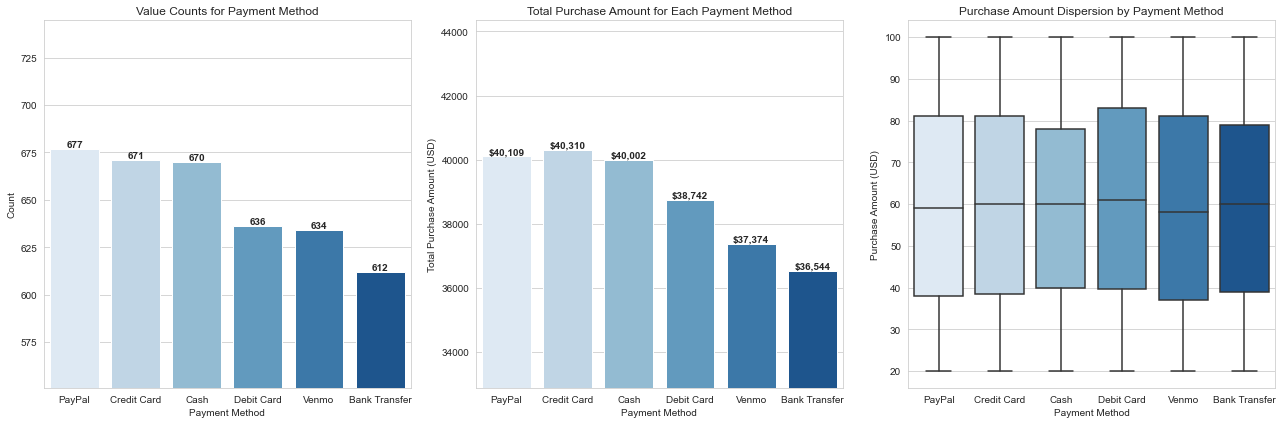

In [31]:
payment_order = df["Payment Method"].value_counts().index.tolist()

plot_categorical_analysis(df, "Payment Method", payment_order)

#### Relation between payment method and reviews/previous purchases

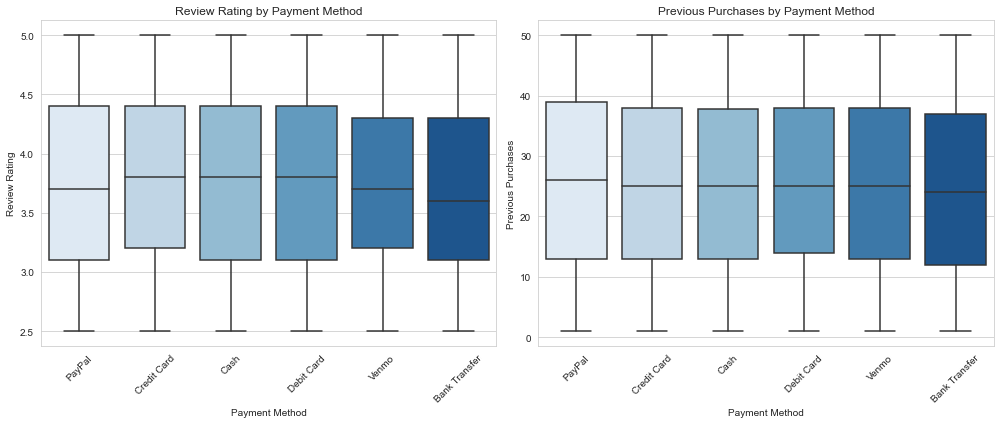

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x="Payment Method", y="Review Rating", ax=axes[0], palette="Blues", order=payment_order)
axes[0].set_title("Review Rating by Payment Method")
axes[0].set_xlabel("Payment Method")
axes[0].set_ylabel("Review Rating")

sns.boxplot(data=df, x="Payment Method", y="Previous Purchases", ax=axes[1], palette="Blues", order=payment_order)
axes[1].set_title("Previous Purchases by Payment Method")
axes[1].set_xlabel("Payment Method")
axes[1].set_ylabel("Previous Purchases")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Observations:
- Credit Card, PayPal, and Cash are the most frequently used payment methods, while Bank Transfer has the lowest transaction count and total purchase amount.
- Total purchase amount follows transaction volume, with Credit Card and PayPal contributing the most, while Bank Transfer and Venmo contribute the least.
- Review ratings and previous purchases show minimal variation across payment methods, suggesting that payment method choice does not significantly impact customer satisfaction or purchase behavior.

### vi. Customer engagement and frequency of purchase

#### Frequency of purchases distribution

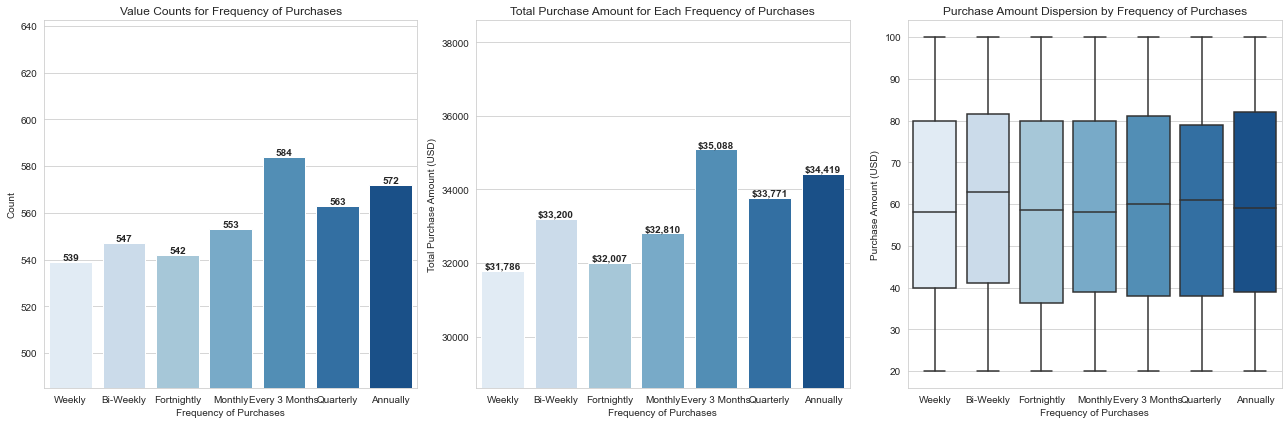

In [33]:
frequency_order = ["Weekly", "Bi-Weekly", "Fortnightly", "Monthly", "Every 3 Months", "Quarterly", "Annually"]

plot_categorical_analysis(df, "Frequency of Purchases", frequency_order)

#### Relation between frequency of purchases and reviews/previous purchases

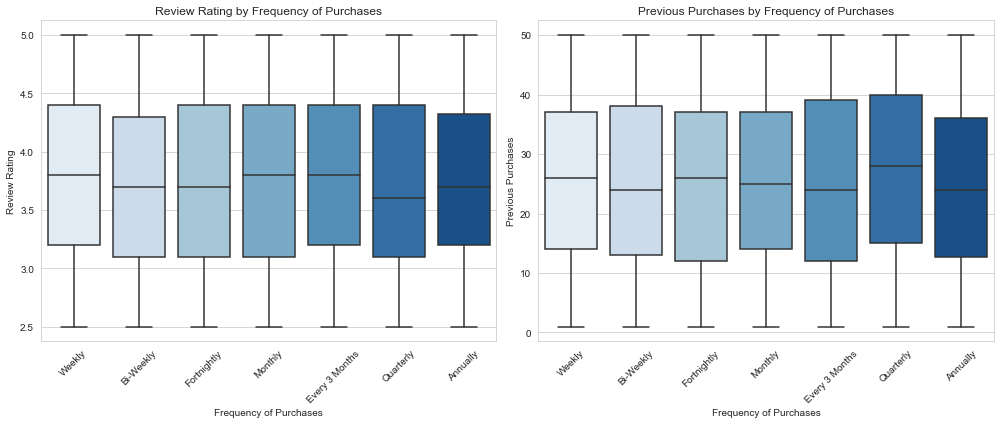

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(data=df, x="Frequency of Purchases", y="Review Rating", ax=axes[0], palette="Blues", order=frequency_order)
axes[0].set_title("Review Rating by Frequency of Purchases")
axes[0].set_xlabel("Frequency of Purchases")
axes[0].set_ylabel("Review Rating")

sns.boxplot(data=df, x="Frequency of Purchases", y="Previous Purchases", ax=axes[1], palette="Blues", order=frequency_order)
axes[1].set_title("Previous Purchases by Frequency of Purchases")
axes[1].set_xlabel("Frequency of Purchases")
axes[1].set_ylabel("Previous Purchases")

for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()


Observations:
- Customers who purchase Every 3 Months and Annually are the most representative, although the distribution across frequencies is relatively similar.
- Purchase amount distribution remains stable across all frequencies, suggesting that spending behavior is not significantly influenced by shopping frequency.
- Review ratings are consistent across all purchase frequencies, indicating that shopping frequency does not strongly impact customer satisfaction.

### vi. Correlations

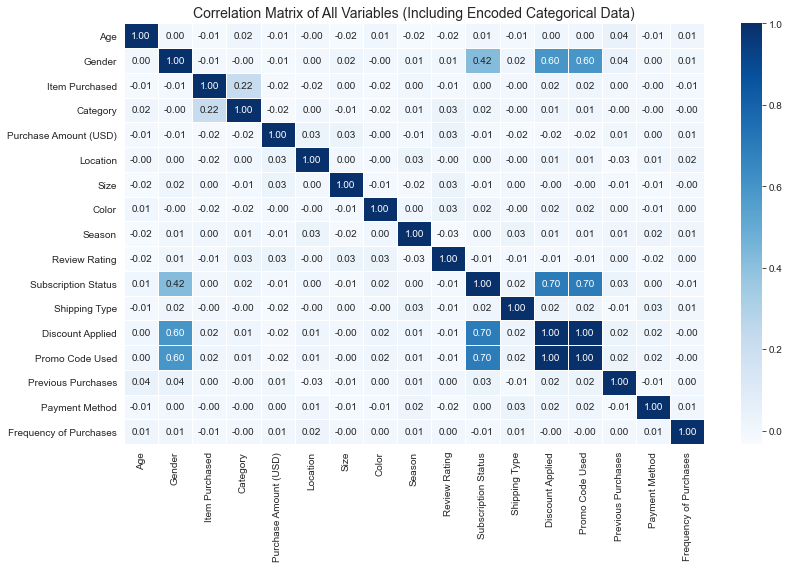

In [35]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['category']).columns:
    df_encoded[col] = df_encoded[col].astype("category").cat.codes  # Convert categories to numeric values

df_encoded = df_encoded.drop(columns=["Customer ID"], errors="ignore")

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of All Variables (Including Encoded Categorical Data)", fontsize=14)
plt.tight_layout()
plt.show()



Observations:
- Weak Correlation with Review Rating: Review ratings show little to no correlation with key variables like previous purchases, purchase amount, or discounts. This suggests that customer satisfaction is not directly influenced by pricing strategies or purchase behavior, indicating a deeper issue with product quality, expectations, or service.
- Promotions & Engagement: There is a strong correlation (0.70) between Discount Applied and Promo Code Used, meaning that customers who use one tend to use the other. However, the lack of correlation between discounts and previous purchases suggests that discount strategies may not be effectively driving long-term customer engagement.
- Subscription Status & Discounts: A high correlation (0.70) between Subscription Status and Discount Applied shows that subscribers are being offered more discounts. However, without a corresponding increase in review ratings or previous purchases, it suggests that subscription benefits might not be creating true customer loyalty.
- Customer Engagement Issue: The low correlation between previous purchases and purchase amount implies that repeat customers do not necessarily spend more, reinforcing the idea that the company is struggling with customer retention and engagement.

## Section 3: Unsupervised learning model (Clustering)

### i. Feature selection

A limited set of features was selected for clustering to ensure meaningful segmentation while avoiding noise from irrelevant variables. The chosen features—purchase amount, previous purchases, category, item purchased, subscription status, discount applied, and purchase frequency—capture key aspects of customer behavior and spending patterns. This selection balances quantitative (spending & frequency) and categorical (product & subscription preferences) data, ensuring that the clusters reflect distinct shopping habits without overcomplicating the model. Using too many features, especially those with low variance or redundancy, could dilute the clustering effectiveness and make the results harder to interpret.

In [64]:
df = pd.read_csv("SmartRetail_dataset.csv")

# Select relevant features 
numerical_features = ['Purchase Amount (USD)', 'Previous Purchases']
categorical_features = ['Category', 'Item Purchased','Subscription Status', 'Discount Applied', 'Frequency of Purchases']

# Preprocessing pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

processed_features = preprocessor.fit_transform(df)

### ii. Dimensionality reduction (t-SNE)

The choice of t-SNE for dimensionality reduction was because it is well-suited for visualizing high-dimensional data while preserving local structures. Unlike PCA, which focuses on maximizing variance, t-SNE is good at capturing complex, nonlinear relationships between data points. Given that our dataset includes categorical variables (e.g., subscription status, discount usage) that increased the number of dimensions, t-SNE helps better separate customer segments in a way that is more interpretable for marketing insights.

In [65]:
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(processed_features.toarray() if hasattr(processed_features, "toarray") else processed_features)  # Using a subset to speed up computation

In [66]:
X_tsne.shape

(3900, 2)

### iii. Definition of number of clusters

#### Elbow Method

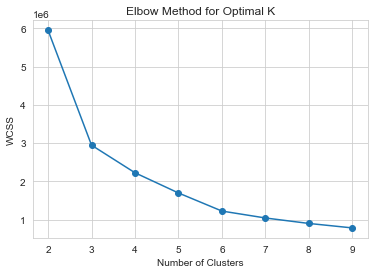

In [67]:
# Determine optimal clusters using Elbow Method
wcss = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(6, 4))
plt.plot(range(2, 10), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

The Elbow Method suggests that the optimal number of clusters is likely around 3, as the WCSS curve starts to flatten after this point. Choosing more clusters beyond this does not significantly reduce within-cluster variance, indicating diminishing returns. A selection of 3 or 4 clusters would likely balance distinct customer segmentation while avoiding overfitting.

#### Dendrogram

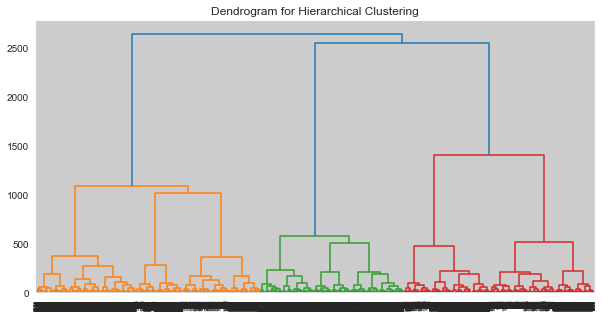

In [68]:
from scipy.cluster.hierarchy import dendrogram, linkage

 ## Dendrogram for Hierarchical Clustering
linked = linkage(X_tsne, 'ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.show()

The dendrogram for hierarchical clustering suggests that the optimal number of clusters is also 3, as indicated by the largest vertical distances between merged clusters before a significant jump in linkage distance. Cutting the dendrogram at this level ensures well-separated clusters while maintaining a reasonable number of groups for meaningful segmentation.

### iii. Clustering

In [69]:
# Function to plot clusters
def plot_clusters(X, labels, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="viridis", legend="full")
    plt.title(title)
    plt.xlabel("t-SNE Component 1")
    plt.ylabel("t-SNE Component 2")
    plt.legend(title="Cluster")
    plt.show()

#### K-Means

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


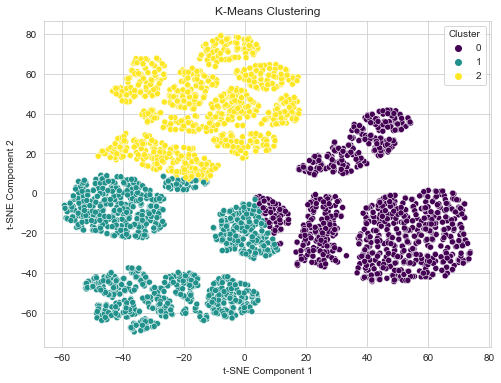

K-Means Silhouette Score: 0.4779


In [70]:
from sklearn.metrics import silhouette_score, adjusted_rand_score

# ## K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tsne)
plot_clusters(X_tsne, kmeans_labels, "K-Means Clustering")
kmeans_score = silhouette_score(X_tsne, kmeans_labels)
print(f"K-Means Silhouette Score: {kmeans_score:.4f}")

#### Hierarchical Clustering

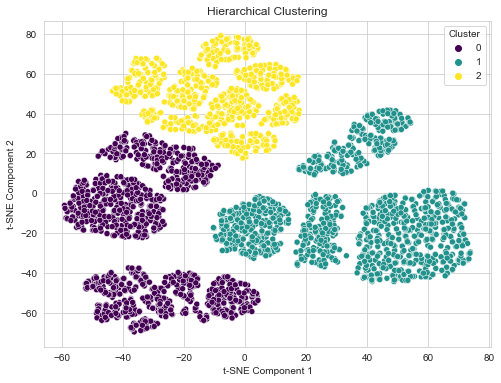

Hierarchical Silhouette Score: 0.4396


In [71]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# ## Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_tsne)
plot_clusters(X_tsne, hierarchical_labels, "Hierarchical Clustering")
hierarchical_score = silhouette_score(X_tsne, hierarchical_labels)
print(f"Hierarchical Silhouette Score: {hierarchical_score:.4f}")

In [72]:
# ## Summary of Clustering Performance
results_df = pd.DataFrame({
    "Clustering Algorithm": ["K-Means", "Hierarchical"],
    "Silhouette Score": [kmeans_score, hierarchical_score]
})

print("\nClustering Performance Summary:")
print(results_df)


Clustering Performance Summary:
  Clustering Algorithm  Silhouette Score
0              K-Means          0.477859
1         Hierarchical          0.439553


The customer segments are reasonably well-defined, as indicated by the Silhouette Scores. K-Means achieved a score of 0.478, while Hierarchical Clustering scored 0.440, suggesting moderate cluster separation. The evaluation was done using the Silhouette Score, which measures how similar each point is to its own cluster versus other clusters. While the scores indicate some overlap between clusters, they still provide meaningful segmentation.

In [73]:
# Asign the clustering with highest performance (K-means)

features = numerical_features + categorical_features
df_selected = df[features]

df_selected["Cluster"] = kmeans_labels

df_selected.head(5)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Purchase Amount (USD),Previous Purchases,Category,Item Purchased,Subscription Status,Discount Applied,Frequency of Purchases,Cluster
0,53,14,Clothing,Blouse,Yes,Yes,Fortnightly,1
1,64,2,Clothing,Sweater,Yes,Yes,Fortnightly,1
2,73,23,Clothing,Jeans,Yes,Yes,Weekly,1
3,90,49,Footwear,Sandals,Yes,Yes,Weekly,1
4,49,31,Clothing,Blouse,Yes,Yes,Annually,1


### iv. Analyze clustering results

In [74]:
# Group by clusters and calculate mean values
cluster_summary = df_selected.groupby("Cluster").mean()

# Display the summary as a table
print(cluster_summary)


         Purchase Amount (USD)  Previous Purchases
Cluster                                           
0                    57.861153           26.278452
1                    60.404603           24.470676
2                    61.097166           25.323077


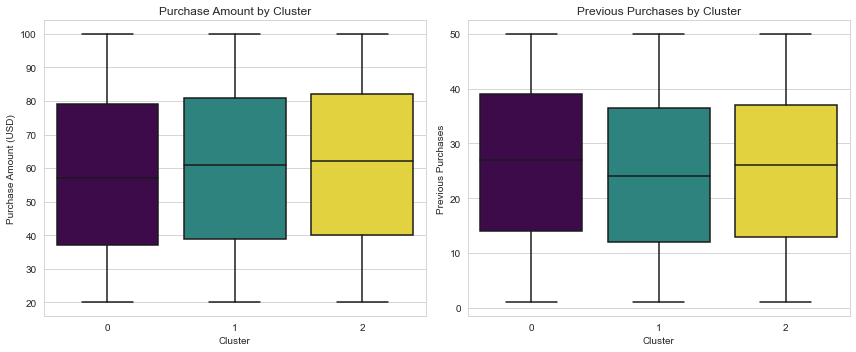

In [75]:
# Set consistent colors for clusters
cluster_palette = ["#440154", "#21918c", "#fde725"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot for Purchase Amount
sns.boxplot(data=df_selected, x="Cluster", y="Purchase Amount (USD)", palette=cluster_palette, ax=axes[0])
axes[0].set_title("Purchase Amount by Cluster")

# Boxplot for Previous Purchases
sns.boxplot(data=df_selected, x="Cluster", y="Previous Purchases", palette=cluster_palette, ax=axes[1])
axes[1].set_title("Previous Purchases by Cluster")

plt.tight_layout()
plt.show()


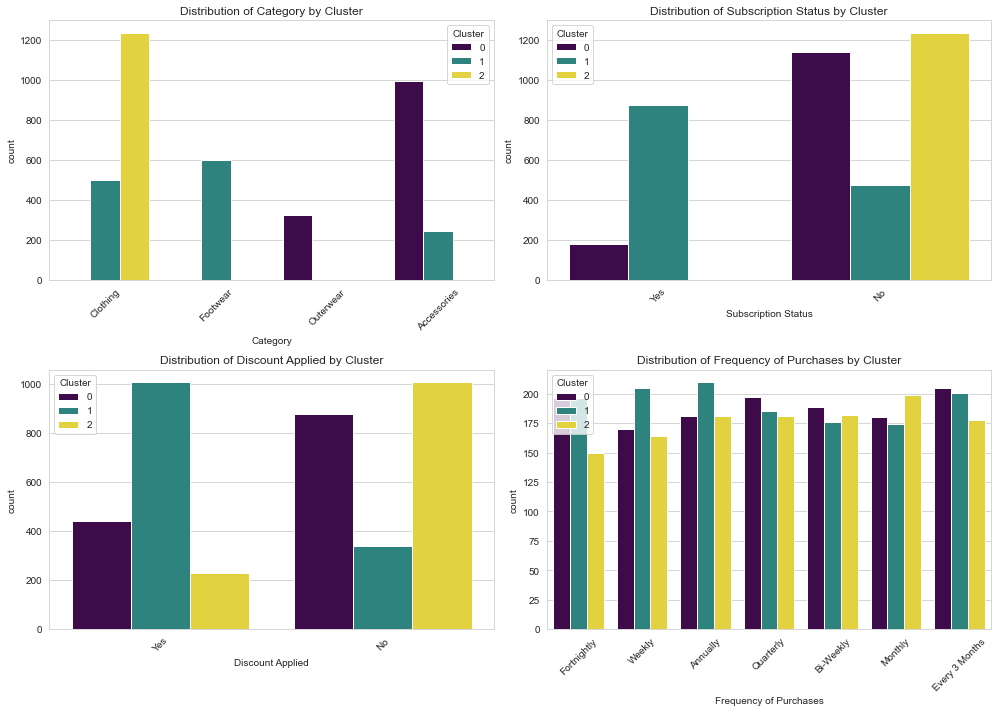

In [76]:
import math

num_features = len(categorical_features) - 1  
rows = math.ceil(num_features / 2)  
cols = min(2, num_features)  

# Create subplots dynamically
fig, axes = plt.subplots(rows, cols, figsize=(14, rows * 5))  
axes = axes.flatten()

i = 0
for cat in categorical_features:
    if cat == "Item Purchased":
        continue  
    
    sns.countplot(data=df_selected, x=cat, hue="Cluster", ax=axes[i], palette=cluster_palette)
    axes[i].set_title(f"Distribution of {cat} by Cluster")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
    i += 1

plt.tight_layout()
plt.show()

#### i) Cluster 0 - Occasional Buyers
- Moderate spending and purchase frequency
- Prefers Accessories and Outerwear
- Uses discounts and subscriptions at a moderate rate
- Represents casual shoppers who purchase when needed but are not highly engaged

#### ii. Cluster 1 - Deal-Driven Frequent Shoppers
- Highest purchase frequency
- Strong reliance on discounts and subscriptions
- Mostly buys Clothing and Footwear
- Price-sensitive customers who respond well to promotions but may not be naturally loyal

#### iii. Cluster 2 - High-Spending Consistent Shoppers
- Spends the most per transaction (61.09)
- Buys mostly Clothing
- Shops less frequently but makes bigger purchases
- Less dependent on discounts and subscriptions
- Represents consistent, high-value customers who buy regardless of promotions

## Section 4: Supervised learning model 

- Target variable: Subscription Status (Yes/No)
- Feature selection: Since we want to predict who will subscribe, we should avoid features that are directly related to subscription (like discounts being offered only to subscribers). 
- Model type: Since the target variable (Subscription) is binary (1 = Subscribed, 0 = Not Subscribed), we should use a classification model: Logistic Regression (for interpretability), Random Forest (for feature importance insights), XGBoost (for high accuracy)

### i. Feature engineering

In [77]:
df = pd.read_csv("SmartRetail_dataset.csv")

In [78]:
df["Subscription Status"] = df["Subscription Status"].apply(lambda x: 1 if x == "Yes" else 0)

In [79]:
# Encode Frequency of Purchases in an ordered manner
frequency_mapping = {
    "Weekly": 6, "Bi-Weekly": 5, "Fortnightly": 4, "Monthly": 3, 
    "Every 3 Months": 2, "Quarterly": 1, "Annually": 0
}

df["Frequency Score"] = df["Frequency of Purchases"].map(frequency_mapping)

drop_columns = ["Subscription Status", "Customer ID", "Size", "Color","Frequency of Purchases", "Location", 
                "Discount Applied", "Promo Code Used"]  # Removing coupon-related features

X = df.drop(columns=drop_columns, errors="ignore")
y = df["Subscription Status"]

# Define Feature Columns
numerical_features = ["Purchase Amount (USD)", "Previous Purchases", "Review Rating", "Age"]
categorical_features = ["Category", "Gender", "Payment Method", "Item Purchased", "Season", "Shipping Type"]

# Preprocessing Pipelines
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

# Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features + ["Frequency Score"]),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Apply transformations and convert to dense format
processed_features = preprocessor.fit_transform(X).toarray()  # Convert sparse matrix to dense array

# Get feature names from the ColumnTransformer
feature_names = (
    numerical_features + ["Frequency Score"] +
    list(preprocessor.named_transformers_["cat"].get_feature_names_out(categorical_features))
)

# Convert back to DataFrame for better interpretability
processed_df = pd.DataFrame(processed_features, columns=feature_names)

processed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 52 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Purchase Amount (USD)         3900 non-null   float64
 1   Previous Purchases            3900 non-null   float64
 2   Review Rating                 3900 non-null   float64
 3   Age                           3900 non-null   float64
 4   Frequency Score               3900 non-null   float64
 5   Category_Accessories          3900 non-null   float64
 6   Category_Clothing             3900 non-null   float64
 7   Category_Footwear             3900 non-null   float64
 8   Category_Outerwear            3900 non-null   float64
 9   Gender_Female                 3900 non-null   float64
 10  Gender_Male                   3900 non-null   float64
 11  Payment Method_Bank Transfer  3900 non-null   float64
 12  Payment Method_Cash           3900 non-null   float64
 13  Pay

### ii. Split the dataset for cross-validation

In [80]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=50)

### iii. Define classification models

In [81]:
models = {
    "Logistic Regression": (
        LogisticRegression(solver="saga", max_iter=1000, class_weight="balanced"),
        {
            "clf__C": [0.001, 0.01, 0.1, 1],  
            "clf__penalty": ['l1', 'l2']
        }
    ),

    "Random Forest": (
        RandomForestClassifier(class_weight="balanced"),
        {
            "clf__n_estimators": [50, 100, 150, 200],  
            "clf__max_depth": [5, None], 
            "clf__min_samples_split": [5, 10, 20] 
        }
    ),

    "XGBoost": (
        xgb.XGBClassifier(eval_metric="logloss"),
        {
            "clf__n_estimators": [50, 100, 150, 200],  
            "clf__learning_rate": [0.05, 0.1, 0.2],  
            "clf__max_depth": [5, None], 
            "clf__subsample": [0.8, 1], 
            "clf__colsample_bytree": [0.8, 1] 
        }
    )
}

### iv. Train and tune models

In [82]:
results = []
best_models = {}

for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    pipeline = Pipeline([
        ("preprocessor", preprocessor),
        ("clf", model)  # Model placeholder
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='precision', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_cv)
    y_pred_proba = best_model.predict_proba(X_cv)[:, 1]

    # Evaluate Performance
    acc = accuracy_score(y_cv, y_pred)
    prec = precision_score(y_cv, y_pred)
    rec = recall_score(y_cv, y_pred)
    f1 = f1_score(y_cv, y_pred)
    auc = roc_auc_score(y_cv, y_pred_proba)

    results.append({
        "Model": model_name,
        "Precision": prec,
        "Recall": rec,
        "Accuracy": acc, 
        "F1-Score": f1, 
        "AUC-ROC": auc,
        "Best Params": grid_search.best_params_
    })

    best_models[model_name] = best_model

Training Logistic Regression...
Training Random Forest...
Training XGBoost...


### iv. Evaluate performance 

In [83]:
df_results = pd.DataFrame(results).sort_values(by="Precision", ascending=False)
display(df_results)

,Model,Precision,Recall,Accuracy,F1-Score,AUC-ROC,Best Params
2,XGBoost,0.414013,0.318627,0.703846,0.360111,0.739805,"{'clf__colsample_bytree': 0.8, 'clf__learning_..."
1,Random Forest,0.399449,0.710784,0.644872,0.511464,0.729473,"{'clf__max_depth': None, 'clf__min_samples_spl..."
0,Logistic Regression,0.395626,0.975490,0.603846,0.562942,0.730009,"{'clf__C': 1, 'clf__penalty': 'l2'}"


Observations:
- XGBoost remains the best model in terms of precision (0.414), making it the most suitable option for targeting subscribers accurately. A higher precision ensures that marketing efforts are focused on customers who are most likely to convert, minimizing wasted resources on uninterested individuals.
- Random Forest follows closely with a precision of 0.398, but it achieves a significantly higher recall (0.71) and a better F1-score (0.52). This indicates that while it captures more potential subscribers, it also introduces more false positives. If the goal includes expanding the reach while maintaining reasonable precision, Random Forest could be considered.
- Logistic Regression has the highest recall (0.975) but the lowest precision (0.395), meaning it misclassifies a large number of non-subscribers as potential targets. This would lead to inefficiencies in a marketing campaign, making it the least suitable model for this task.

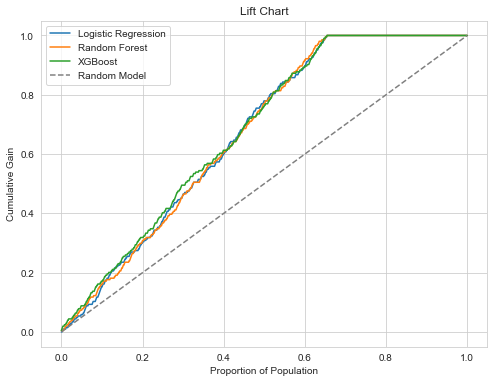

In [84]:
def plot_lift_chart(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model_name, model in models.items():
        # Predict probabilities
        y_prob = model.predict_proba(X_test)[:, 1]
        
        # Sort test labels based on predicted probabilities
        sorted_indices = np.argsort(-y_prob)  # Descending order
        sorted_y_test = np.array(y_test.to_numpy())[sorted_indices]

        # Compute cumulative gain
        cum_gains = np.cumsum(sorted_y_test) / np.sum(sorted_y_test)
        
        # Plot Lift Curve
        plt.plot(np.linspace(0, 1, len(cum_gains)), cum_gains, label=f'{model_name}')

    # Random Model Reference Line
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random Model")

    # Chart Formatting
    plt.xlabel("Proportion of Population")
    plt.ylabel("Cumulative Gain")
    plt.title("Lift Chart")
    plt.legend()
    plt.show()

# Call function using best trained models
plot_lift_chart(best_models, X_cv, y_cv)

Observations:
- Limited model differentiation: The lift curves for all three models (Logistic Regression, Random Forest, and XGBoost) are very close to each other, suggesting that no model provides a significantly stronger lift over the others. This could indicate that the features used in the model may not be highly predictive of the target variable.
- Lack of strong lift effect: The curve flattens after around 60% of the population, implying that the models struggle to effectively rank potential subscribers beyond a certain point. 

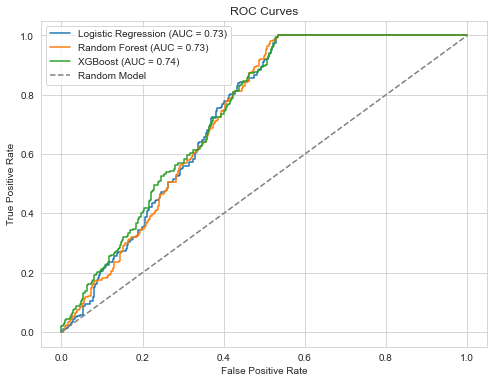

In [85]:
# Define function to plot ROC curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model_name, model in models.items():
        # Predict probabilities
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probabilities for class 1
        
        # Compute ROC Curve
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        
        # Plot each model's ROC curve
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

    # Plot baseline random model
    plt.plot([0, 1], [0, 1], linestyle="--", color="grey", label="Random Model")

    # Formatting
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves")
    plt.legend()
    plt.show()

# Call the function using best trained models
plot_roc_curve(best_models, X_cv, y_cv)

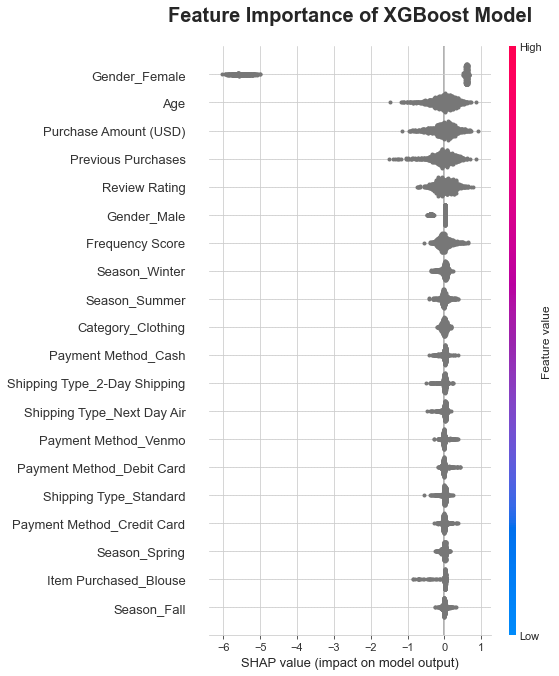

In [86]:
X_cv_processed = preprocessor.transform(X_cv)

# Get the XGBoost model inside the pipeline
xgb_model = best_models["XGBoost"].named_steps["clf"]  # Extract trained XGBoost model

booster = xgb_model.get_booster()
booster.save_raw = lambda self=None: model_bytearray

# Use SHAP TreeExplainer for XGBoost
explainer_xgb = shap.TreeExplainer(booster)

# Get SHAP values (Handles Binary Classification)
shap_values_xgb = explainer_xgb.shap_values(X_cv_processed)

# Convert SHAP values to NumPy array
shap_values_xgb = np.array(shap_values_xgb)

# Extract feature names from the preprocessor pipeline
encoder = preprocessor.named_transformers_["cat"]  # Get categorical transformer
cat_feature_names = encoder.get_feature_names_out(categorical_features)

all_feature_names = numerical_features + ["Frequency Score"] + list(cat_feature_names)

shap_values_xgb_exp = shap.Explanation(
    values=shap_values_xgb,
    base_values=explainer_xgb.expected_value,
    data=X_cv_processed,
    feature_names=all_feature_names  
)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance of XGBoost Model", pad=25, fontsize=20, fontweight="bold")
shap.summary_plot(shap_values_xgb_exp.values, shap_values_xgb_exp.data, feature_names=all_feature_names)
plt.show()


Observations:
- "Gender_Female" dominates the model's predictions – This feature has the highest SHAP value range, meaning it significantly influences whether a customer is classified as a subscriber or not. However, given the dataset imbalance (with few or no female subscribers), this could indicate a model bias that needs to be investigated.
- Age, purchase behavior, and review rating also have a strong impact – Features like Age, Purchase Amount (USD), Previous Purchases, and Review Rating contribute meaningfully to predictions. This suggests that higher spending and engagement history influence subscription likelihood.
- Many categorical features have minimal impact – Features like shipping type, season, and item category show low SHAP values, indicating they have little influence on predictions. This suggests that these variables may not be critical in determining subscription behavior and could potentially be removed to simplify the model.

## Section 5: Recommendation System (Content-based)

### i. Content-based system using only item description information (category and color)

In [59]:
df = pd.read_csv("smartretail_dataset.csv")  

# Combine relevant features for item similarity
df['combined_features'] = df['Item Purchased'] + '-' + df['Category'] + "-" + df['Color'] 
df_combined = df.drop_duplicates(subset=['combined_features']).reset_index(drop=True)

# Convert features into a TF-IDF matrix
vectorizer = TfidfVectorizer()
item_matrix = vectorizer.fit_transform(df_combined['combined_features'])

# Compute Cosine Similarity Between items
similarity = cosine_similarity(item_matrix)
item_sim_df = pd.DataFrame(similarity, index=df_combined['combined_features'], columns=df_combined['combined_features'])

print("Item Similarity Matrix Sample:")
print(item_sim_df.iloc[:5, :5])

Item Similarity Matrix Sample:
combined_features          Blouse-Clothing-Gray  Sweater-Clothing-Maroon  \
combined_features                                                          
Blouse-Clothing-Gray                   1.000000                 0.086444   
Sweater-Clothing-Maroon                0.086444                 1.000000   
Jeans-Clothing-Maroon                  0.086444                 0.543222   
Sandals-Footwear-Maroon                0.000000                 0.431239   
Blouse-Clothing-Turquoise              0.543222                 0.086444   

combined_features          Jeans-Clothing-Maroon  Sandals-Footwear-Maroon  \
combined_features                                                           
Blouse-Clothing-Gray                    0.086444                 0.000000   
Sweater-Clothing-Maroon                 0.543222                 0.431239   
Jeans-Clothing-Maroon                   1.000000                 0.431239   
Sandals-Footwear-Maroon                 0.431239   

In [60]:
# Finding items similar to a specific item
target_item = "Blouse-Clothing-Gray"

similar_items = item_sim_df[target_item]  # Extract column for target item

similar_items = similar_items.sort_values(ascending=False).iloc[1:6]  # Exclude itself & get top 5

# Print the results
print(f"Top 5 similar items to {target_item}:")
print(similar_items)


Top 5 similar items to Blouse-Clothing-Gray:
combined_features
Shirt-Clothing-Gray       0.584192
T-shirt-Clothing-Gray     0.584192
Blouse-Clothing-Brown     0.543222
Blouse-Clothing-Yellow    0.543222
Blouse-Clothing-Pink      0.543222
Name: Blouse-Clothing-Gray, dtype: float64


In [61]:
def recommend_items_for_customer(customer_id, df, item_sim_df, top_n=5):
    """Prints purchased items and top recommended items for a given customer."""
    
    # Retrieve items purchased by the customer
    purchased_items = df[df['Customer ID'] == customer_id]['combined_features'].unique()
    
    if len(purchased_items) == 0:
        print(f"No purchases found for Customer {customer_id}.")
        return
    
    print(f"\nCustomer {customer_id} purchased:")
    for item in purchased_items:
        print(f"- {item}")

    # Find recommended items based on similarity
    recommended_items = {}
    
    for item in purchased_items:
        if item in item_sim_df.index:
            similar_items = item_sim_df[item].sort_values(ascending=False).iloc[1:top_n+1]
            for rec_item, score in similar_items.items():
                if rec_item not in recommended_items:
                    recommended_items[rec_item] = score
                else:
                    recommended_items[rec_item] = max(recommended_items[rec_item], score)  # Keep highest score
    
    # Sort recommendations by highest similarity score
    sorted_recommendations = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)[:top_n]

    if sorted_recommendations:
        print("\nTop 5 Recommendations:")
        for rec_item, score in sorted_recommendations:
            print(f"- {rec_item} (Similarity Score: {score:.4f})")
    else:
        print("\nNo recommendations available for this customer.")

# Example usage:
customer_id = 1571
recommend_items_for_customer(customer_id, df, item_sim_df)



Customer 1571 purchased:
- Pants-Clothing-Brown

Top 5 Recommendations:
- T-shirt-Clothing-Brown (Similarity Score: 0.5842)
- Shirt-Clothing-Brown (Similarity Score: 0.5842)
- Shorts-Clothing-Brown (Similarity Score: 0.5432)
- Pants-Clothing-Turquoise (Similarity Score: 0.5432)
- Skirt-Clothing-Brown (Similarity Score: 0.5432)


### ii. Content-based system adding other features like customer demographics and boosting by item's price and ratings

In [62]:
df = pd.read_csv("smartretail_dataset.csv")  

# Define age bins
age_bins = [18, 24, 34, 44, 54, np.inf]  # Bin edges
age_labels = ["Young Adult", "Adult", "Middle-Aged", "Older Adult", "Senior"]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Combine relevant features for item similarity
df['combined_features'] = df['Item Purchased'] + '-' + df['Category'] + "-" + df['Color']

# Drop duplicates for unique items
df_combined = df.drop_duplicates(subset=['combined_features']).reset_index(drop=True)

# Convert features into a TF-IDF matrix
vectorizer = TfidfVectorizer()
item_matrix = vectorizer.fit_transform(df_combined['combined_features'])

# Compute Cosine Similarity Between items
similarity = cosine_similarity(item_matrix)
item_sim_df = pd.DataFrame(similarity, index=df_combined['combined_features'], columns=df_combined['combined_features'])

# Function to recommend items for a customer considering multiple factors
def recommend_items_for_customer(customer_id, df, item_sim_df, top_n=5, 
                                 w_similarity=0.4, w_purchase=0.2, w_rating=0.2, w_demographics=0.2):
    """Prints purchased items and top recommended items for a given customer based on weighted factors."""
    
    # Retrieve customer profile
    customer_data = df[df['Customer ID'] == customer_id]
    if customer_data.empty:
        print(f"No purchases found for Customer {customer_id}.")
        return

    # Get purchased item
    purchased_item = customer_data['combined_features'].values[0]
    
    # Get customer demographic info
    customer_age_group = customer_data['Age Group'].values[0]
    customer_gender = customer_data['Gender'].values[0]
    customer_location = customer_data['Location'].values[0]
    customer_season = customer_data['Season'].values[0]

    print(f"\nCustomer {customer_id} purchased: {purchased_item}")

    # Find recommended items based on similarity
    recommended_items = {}

    if purchased_item in item_sim_df.index:
        similar_items = item_sim_df[purchased_item].sort_values(ascending=False).iloc[1:top_n+1]  # Exclude itself

        for rec_item, similarity_score in similar_items.items():
            rec_item_data = df[df['combined_features'] == rec_item]
            
            if rec_item_data.empty:
                continue

            avg_purchase_amount = rec_item_data['Purchase Amount (USD)'].mean()
            avg_rating = rec_item_data['Review Rating'].mean()

            # Find what similar customers purchased 
            similar_customers_purchases = df[
                (df['Age Group'] == customer_age_group) & 
                (df['Gender'] == customer_gender) & 
                (df['Location'] == customer_location) & 
                (df['Season'] == customer_season)
            ]['combined_features'].value_counts()

            if not similar_customers_purchases.empty:
                demographic_score = similar_customers_purchases.get(rec_item, 0)
                demographic_score = demographic_score / similar_customers_purchases.max()  # Normalize to 0-1
            else:
                demographic_score = 0  # If no similar customers, default to 0

            # Normalize purchase amount and rating using MinMaxScaler
            scaler = MinMaxScaler()
            normalized_values = scaler.fit_transform(
                np.array([avg_purchase_amount, avg_rating]).reshape(1, -1)
            ).flatten()

            norm_purchase = normalized_values[0]
            norm_rating = normalized_values[1]

            # Compute final weighted score
            final_score = (w_similarity * similarity_score) + \
                          (w_purchase * norm_purchase) + \
                          (w_rating * norm_rating) + \
                          (w_demographics * demographic_score)

            # Store max score for each recommended item
            if rec_item not in recommended_items:
                recommended_items[rec_item] = final_score
            else:
                recommended_items[rec_item] = max(recommended_items[rec_item], final_score)

    # Sort recommendations by highest score
    sorted_recommendations = sorted(recommended_items.items(), key=lambda x: x[1], reverse=True)[:top_n]

    if sorted_recommendations:
        print("\nTop 5 Recommendations:")
        for rec_item, score in sorted_recommendations:
            print(f"- {rec_item} (Weighted Score: {score:.4f})")
    else:
        print("\nNo recommendations available for this customer.")

# Example usage:
customer_id = 1571
recommend_items_for_customer(customer_id, df, item_sim_df)




Customer 1571 purchased: Pants-Clothing-Brown

Top 5 Recommendations:
- Shorts-Clothing-Brown (Weighted Score: 0.4173)
- T-shirt-Clothing-Brown (Weighted Score: 0.2337)
- Shirt-Clothing-Brown (Weighted Score: 0.2337)
- Pants-Clothing-Turquoise (Weighted Score: 0.2173)
- Skirt-Clothing-Brown (Weighted Score: 0.2173)


### iii. Evaluate system

In [63]:
def evaluate_similarity(df, item_sim_df, top_n=5):
    """Evaluates how similar recommended items are to the actual purchased item."""

    similarity_scores = []

    for customer_id in df['Customer ID'].unique():
        purchased_item = df[df['Customer ID'] == customer_id]['combined_features'].values[0]

        if purchased_item in item_sim_df.index:
            # Get recommended items
            similar_items = item_sim_df[purchased_item].sort_values(ascending=False).iloc[1:top_n+1]

            # Store similarity scores
            similarity_scores.extend(similar_items.values)

    avg_similarity = np.mean(similarity_scores) if similarity_scores else 0
    print(f"\nAverage Similarity Score of Recommended Items: {avg_similarity:.4f}")

# Run evaluation
evaluate_similarity(df, item_sim_df)



Average Similarity Score of Recommended Items: 0.5787
